# Preprocessing and Modeling

# 1. Data Preprocessing

# 2. Model Training and Evaluation

In [34]:
# Let's import the libraries 
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [35]:
#Let's read the data 
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [37]:
# Drop unnecessary columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

In [38]:
# Let's convert the categorical values in the diagnosis column of the DataFrame df to numerical values.
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

# Display transformed DataFrame
print("\nTransformed DataFrame:")
print(df['diagnosis'])


Transformed DataFrame:
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [39]:
# Define features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [40]:
# Scaling the feature to ensure they have a similar scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#To ensuring that the structure of the DataFrame remains consistent, we set xolumns to X.columns
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [41]:
# Split the dataset into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
#Compute the correlation matrix
corr_matrix = X_train.corr()

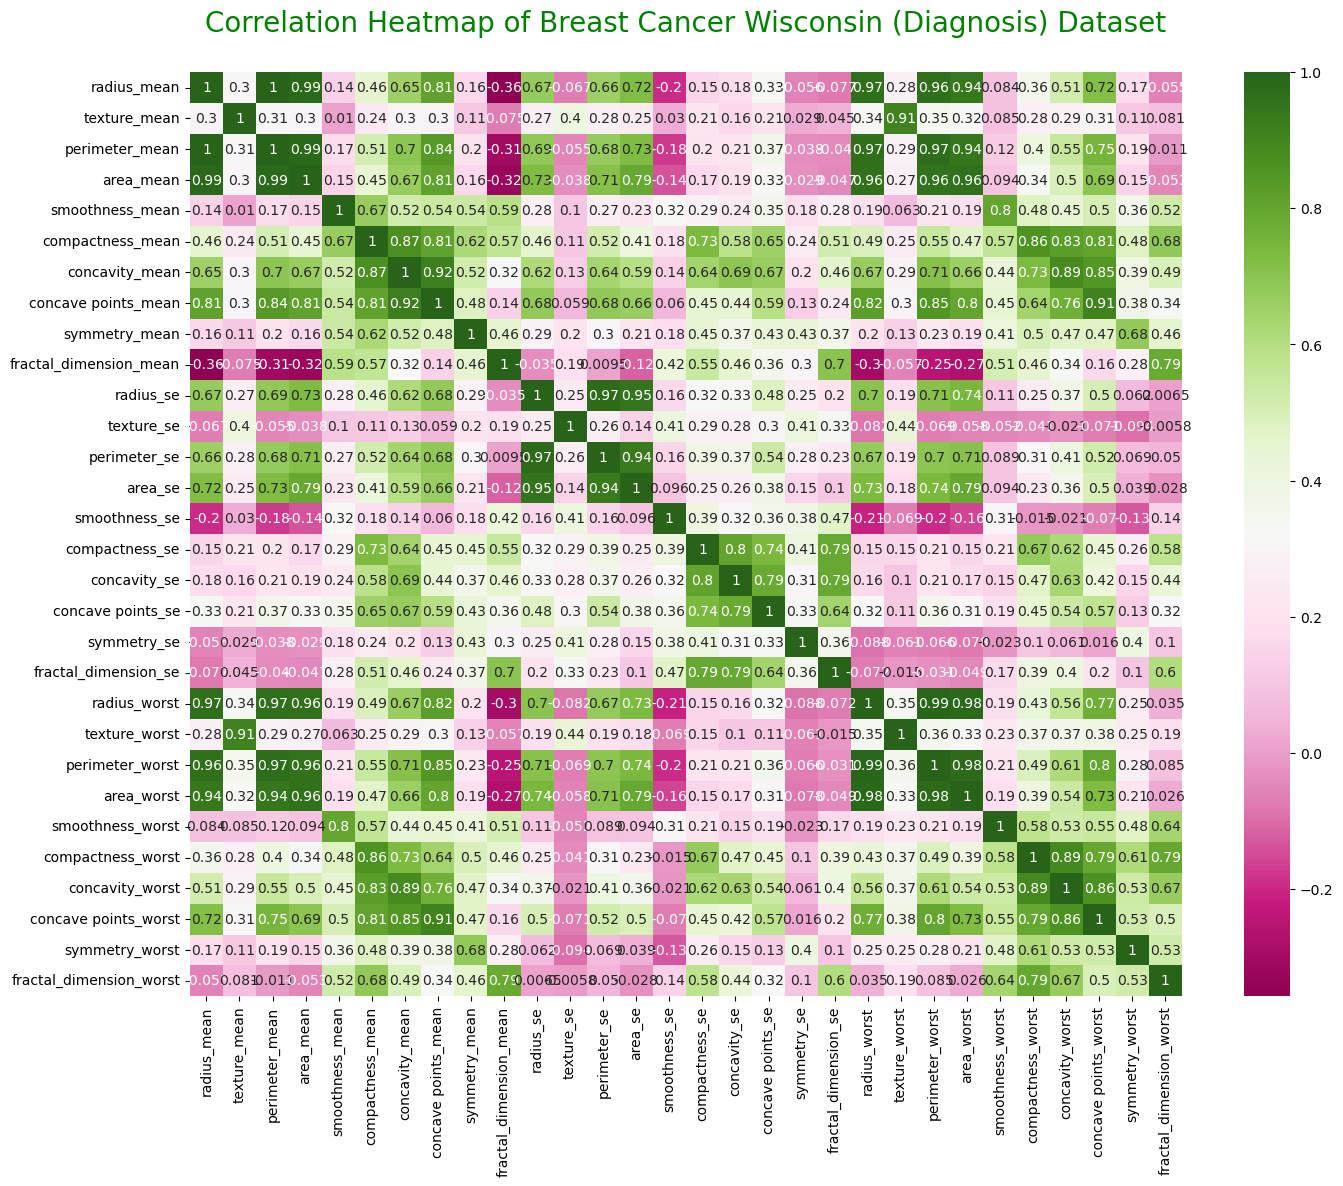

In [43]:
# Plot the heatmap 
plt.figure(figsize = (16,12))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Heatmap of Breast Cancer Wisconsin (Diagnosis) Dataset\n', fontsize=20, color='green')
plt.show()

# Ensemble Methods/ Random Forest


In [44]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Make predictions on the test set
y_pred = model_rf.predict(X_test_scaled)

Confusion Matrix:
[[107   1]
 [  4  59]]


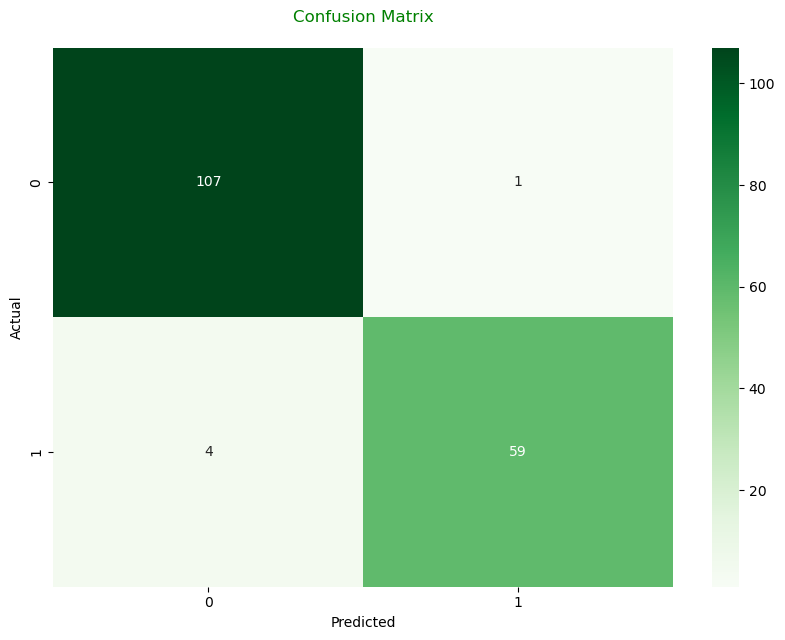

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\n', color='green')
plt.show()

In [59]:
# Cross-validation for Random Forest
rf = RandomForestClassifier()
rf_cv_score = cross_val_score(rf, X, y, cv=5, scoring ='roc_auc')
print(f'Random Forest Cross Validation AUC-ROC: {rf_cv_score.mean()}')


Random Forest Cross Validation AUC-ROC: 0.9914615275633126


In [49]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
print(f'Best Random Forest Parameters: {grid_search.best_params_}')
print(f'Best Random Forest AUC-ROC: {grid_search.best_score_}')

C:\Users\dinab\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dinab\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dinab\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\dinab\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dinab\anaconda3\Lib\site-package

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 100}
Best Random Forest AUC-ROC: 0.9923413651590854


The Random Forest model trained with 100 estimators achieved high accuracy and provided reliable predictions for breast cancer classification.
The cross-validation score for AUC-ROC was also high, indicating strong performance across different subsets of the data.
Hyperparameter tuning further improved the model's performance.

In [51]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


                    Feature  importance
7       concave points_mean    0.141934
27     concave points_worst    0.127136
23               area_worst    0.118217
6            concavity_mean    0.080557
20             radius_worst    0.077975
22          perimeter_worst    0.074292
2            perimeter_mean    0.060092
3                 area_mean    0.053810
26          concavity_worst    0.041080
0               radius_mean    0.032312
13                  area_se    0.029538
21            texture_worst    0.018786
25        compactness_worst    0.017539
10                radius_se    0.016435
28           symmetry_worst    0.012929
12             perimeter_se    0.011770
24         smoothness_worst    0.011769
1              texture_mean    0.011064
5          compactness_mean    0.009216
19     fractal_dimension_se    0.007135
29  fractal_dimension_worst    0.006924
4           smoothness_mean    0.006223
14            smoothness_se    0.005881
16             concavity_se    0.005816


The Random Forest model identified the most important features contributing to the prediction of malignancy.
Key features included concave points_mean, concave points_worst, area_worst, concavity_mean, and radius_worst.

In [61]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Define LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Malignant', 
                                                                                                               'Benign'], 
                                                                                                 discretize_continuous=True)

# Choose an instance to explain
instance_to_explain = X_test.iloc[0]

# Explain the prediction
explanation = explainer.explain_instance(instance_to_explain, rf.predict_proba, num_features=5)

# Visualize the explanation
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                                    feature_names=X_train.columns, 
                                                    class_names=['Malignant', 'Benign'], 
                                                    discretize_continuous=True)

# Choose an instance to explain
instance_index = 0
instance_to_explain = X_test.iloc[instance_index]

# Explain the prediction
explanation = explainer.explain_instance(instance_to_explain, rf.predict_proba, num_features=5)

# Visualize the explanation
explanation.show_in_notebook(show_table=True)

# Conclusion